# Structured and time series data

In [1]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)


In [2]:
%matplotlib inline%reload_ext autoreload
%autoreload 2

UsageError: unrecognized arguments: autoreload


In [3]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/smartmeters/'

## Create datasets

In [4]:
file='weather_daily_darksky.csv'
df_weather_daily=pd.read_csv(PATH+file)


In [5]:
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,15.57,11/1/2011 6:54,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,15.06,11/2/2011 6:56,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,17.41,11/3/2011 6:58,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,15.54,11/4/2011 6:59,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,13.94,11/5/2011 7:01,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34


In [6]:
df_weather_daily["time"]=pd.to_datetime(df_weather_daily["time"])
df_weather_daily=df_weather_daily.sort_values(["time"])
#df_weather_daily.columns

In [7]:
df_weather_daily["day"]=df_weather_daily.apply(lambda row:row["time"].strftime("%Y-%m-%d"),axis=1)
df_weather_daily.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'day'],
      dtype='object')

In [8]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)
df_weather_daily=df_weather_daily.drop_duplicates(["day"])
#df_weather_daily=df_weather_daily.set_index(("day"))
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day,temperatureMean
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21,2011-11-01,12.625
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24,2011-11-02,12.035
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27,2011-11-03,15.100
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31,2011-11-04,13.535
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34,2011-11-05,12.055


In [9]:
df_weather_daily.temperatureMax.count()

879

In [25]:
file='block_0.csv'
PATH_block_hh='data/smartmeters//hhblock_dataset/hhblock_dataset/'
block_hh=pd.read_csv(PATH_block_hh+file)

PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
block_daily_1  = pd.read_csv(PATH_block_daily+file)

In [291]:
#files= ['block_0.csv','block_1.csv']
#blocks=[]
#PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
#for f in files: 
 #   blocks.append(pd.read_csv(PATH_block_daily+f))
#block_daily_all = pd.concat(blocks)
    



In [11]:
#len(block_daily_all)

In [26]:
block_daily_1.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [27]:
DataFrameSummary(block_daily_1).summary()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,NaN,NaN,25574,25574,25574,25574,25496,25574,25574
mean,NaN,NaN,0.366426,0.450346,1.34815,47.8071,0.282705,21.5438,0.167271
std,NaN,NaN,0.407172,0.421025,0.910607,2.77149,0.201086,20.205,0.255782
min,NaN,NaN,0.007,0.012,0.012,1,0.00249885,0.012,0
25%,NaN,NaN,0.1455,0.213896,0.732,48,0.138956,10.231,0.05
50%,NaN,NaN,0.2315,0.318958,1.173,48,0.243201,15.26,0.091
75%,NaN,NaN,0.4065,0.528979,1.762,48,0.384356,25.3328,0.159
max,NaN,NaN,5.522,5.79112,8.171,48,2.55737,277.974,5.052
counts,25574,25574,25574,25574,25574,25574,25496,25574,25574
uniques,50,819,3878,23110,3924,22,25474,23383,1343


In [13]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25574 entries, 0 to 25573
Data columns (total 9 columns):
LCLid            25574 non-null object
day              25574 non-null object
energy_median    25574 non-null float64
energy_mean      25574 non-null float64
energy_max       25574 non-null float64
energy_count     25574 non-null int64
energy_std       25496 non-null float64
energy_sum       25574 non-null float64
energy_min       25574 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [28]:
pd.crosstab(index=block_daily_1["LCLid"], columns="count")[15:]

col_0,count
LCLid,
MAC003428,516
MAC003449,515
MAC003463,314
MAC003482,514
MAC003553,509
MAC003557,408
MAC003566,508
MAC003579,508
MAC003597,507


This shows not all households have unifrom counts. On further investigation in excel we notice that most of the households have data from Jan 2013 to Jan 2014. Now we extract only those households with data within these date ranges

In [90]:

mask = (block_daily_1['day'] >= '2013-01-01') & (block_daily_1['day'] <= '2014-01-31')
block_daily=block_daily_1.loc[mask]

In [91]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
81,MAC000002,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
82,MAC000002,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
83,MAC000002,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
84,MAC000002,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
85,MAC000002,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [92]:
get_householdid=list(block_daily["LCLid"].unique())
len(get_householdid)

49

# Merging daily_dataset consumption with weather data

In [93]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)

In [94]:
dict_result={}
for household in tqdm(get_householdid[:10]):
    df_household=block_daily[block_daily["LCLid"]==household]
  #df_cross=pd.concat([df_household,df_weather_daily],axis=1, keys=["day"])
    df_cross = pd.merge(left=df_household,right=df_weather_daily, how='left', left_on='day', right_on='day')
    dict_result[household]= df_cross
  

100%|██████████| 10/10 [00:00<00:00, 115.18it/s]


In [95]:
dict_result[household]


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC003388,2013-01-01,0.6325,0.763208,1.952,48,0.540247,36.634000,0.149,7.49,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,MAC003388,2013-01-02,0.1900,0.188792,0.290,48,0.053227,9.062000,0.095,10.82,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,MAC003388,2013-01-03,0.2050,0.515333,2.362,48,0.532339,24.736000,0.095,11.41,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,MAC003388,2013-01-04,0.4250,0.536375,1.726,48,0.385109,25.746000,0.077,10.79,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,MAC003388,2013-01-05,0.5140,0.788083,2.094,48,0.623819,37.828000,0.140,10.66,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250
5,MAC003388,2013-01-06,0.3315,0.704542,2.283,48,0.605062,33.818000,0.161,8.61,...,1/6/2013 8:06,1/6/2013 11:00,1/6/2013 12:00,Foggy until afternoon.,1/7/2013 6:00,5.08,1/6/2013 11:00,1/7/2013 6:00,0.80,7.760
6,MAC003388,2013-01-07,0.3360,0.594917,2.147,48,0.504463,28.556000,0.097,9.08,...,1/7/2013 8:05,1/7/2013 14:00,1/7/2013 12:00,Mostly cloudy throughout the day.,1/7/2013 19:00,5.24,1/7/2013 23:00,1/7/2013 19:00,0.84,8.090
7,MAC003388,2013-01-08,0.4510,0.576042,1.795,48,0.451199,27.650000,0.068,11.23,...,1/8/2013 8:05,1/8/2013 13:00,1/8/2013 11:00,Mostly cloudy throughout the day.,1/9/2013 8:00,6.90,1/8/2013 13:00,1/9/2013 8:00,0.88,10.125
8,MAC003388,2013-01-09,0.3590,0.453333,1.360,48,0.338963,21.760000,0.089,9.21,...,1/9/2013 8:04,1/9/2013 7:00,1/9/2013 11:00,Partly cloudy until evening.,1/10/2013 2:00,1.77,1/9/2013 5:00,1/10/2013 2:00,0.92,5.490
9,MAC003388,2013-01-10,0.6045,0.784021,2.546,48,0.680470,37.633000,0.090,3.43,...,1/10/2013 8:04,1/10/2013 15:00,1/10/2013 12:00,Mostly cloudy throughout the day.,1/11/2013 6:00,-0.48,1/10/2013 9:00,1/11/2013 6:00,0.95,2.295


In [96]:
#df_cross.columns

In [97]:
#df_cross[['day', 'energy_sum','windSpeed']]

# Plotting graph between temperature mean and total energy consumed for 10 households of block0

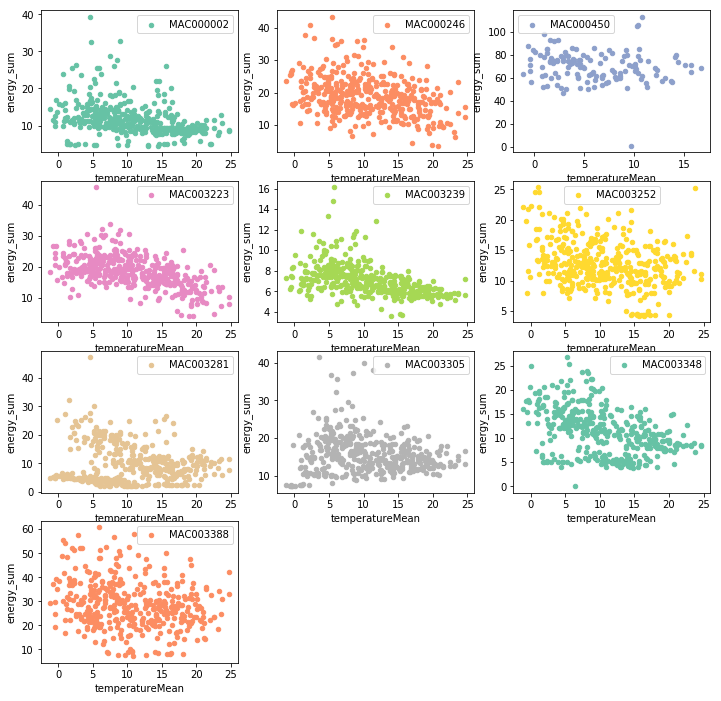

In [98]:
fig,ax=plt.subplots(figsize=(12,12))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(4,3,i+1)
    dict_result[household].plot(ax=ax,x="temperatureMean",y=('energy_sum'),kind="scatter",color=palette[i],label=household)
plt.legend()
plt.show()

## Aggregating daily_energy data by day

In [99]:
block_daily_agg = block_daily.drop(['LCLid'], axis = 1)

In [100]:
block_daily_agg.head()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
81,2013-01-01,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
82,2013-01-02,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
83,2013-01-03,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
84,2013-01-04,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
85,2013-01-05,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [101]:
block_daily_agg_raw = block_daily_agg

In [102]:
block_daily_agg = block_daily_agg[['day', 'energy_sum']]
len(block_daily_agg)

18518

In [103]:
block_daily_agg = block_daily_agg.groupby(['day']).sum().reset_index()

In [104]:
block_daily_mean = block_daily_agg_raw[['day', 'energy_mean']]
block_daily_mean = block_daily_mean.groupby(['day']).mean().reset_index()

In [105]:
len(block_daily_mean)

396

In [106]:
block_daily_agg.describe()

,energy_sum
count,396.000000
mean,960.396677
std,161.623630
min,702.667001
25%,815.863750
50%,957.859000
75%,1077.118250
max,1505.642999


In [107]:
block_daily_mean.describe()

,energy_mean
count,396.000000
mean,0.429182
std,0.075357
min,0.307025
25%,0.358455
50%,0.436225
75%,0.492187
max,0.653491


In [108]:
block_daily_agg = pd.merge(left=block_daily_agg,right=block_daily_mean, how='left', left_on='day', right_on='day')

In [109]:
block_daily_agg.head()

,day,energy_sum,energy_mean
0,2013-01-01,1107.903999,0.480861
1,2013-01-02,1053.920000,0.457431
2,2013-01-03,1065.897001,0.462629
3,2013-01-04,1065.254000,0.462350
4,2013-01-05,1205.142999,0.523066


In [110]:
file1 = 'uk_bank_holidays.csv'
PATH_holiday='data/smartmeters/'
holiday  = pd.read_csv(PATH_holiday+file1)

In [111]:
holiday.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [112]:
agg_holiday = pd.merge(left=block_daily_agg,right=holiday, how='left', left_on='day', right_on='Bank holidays')

In [113]:
agg_holiday.describe()

,energy_sum,energy_mean
count,396.000000,396.000000
mean,960.396677,0.429182
std,161.623630,0.075357
min,702.667001,0.307025
25%,815.863750,0.358455
50%,957.859000,0.436225
75%,1077.118250,0.492187
max,1505.642999,0.653491


# ## merging with weather data

In [114]:
agg_holiday_weather = pd.merge(left=agg_holiday,right=df_weather_daily, how='left', left_on='day', right_on='day')

In [115]:
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2013-01-01,1107.903999,0.480861,2013-01-01,New Year?s Day,7.49,1/1/2013 1:00,257.0,partly-cloudy-day,2.40,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,2013-01-02,1053.920000,0.457431,NaN,NaN,10.82,1/2/2013 22:00,242.0,partly-cloudy-night,5.41,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,2013-01-03,1065.897001,0.462629,NaN,NaN,11.41,1/3/2013 13:00,255.0,partly-cloudy-day,9.12,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,2013-01-04,1065.254000,0.462350,2013-01-04,Easter Monday,10.79,1/4/2013 0:00,266.0,partly-cloudy-day,7.31,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,2013-01-05,1205.142999,0.523066,NaN,NaN,10.66,1/5/2013 14:00,251.0,partly-cloudy-day,7.82,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [116]:
agg_holiday_weather.columns

Index(['day', 'energy_sum', 'energy_mean', 'Bank holidays', 'Type',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [117]:
agg_holiday_weather['Bank holidays'] .fillna('noholiday', inplace=True); 
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2013-01-01,1107.903999,0.480861,2013-01-01,New Year?s Day,7.49,1/1/2013 1:00,257.0,partly-cloudy-day,2.40,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,2013-01-02,1053.920000,0.457431,noholiday,NaN,10.82,1/2/2013 22:00,242.0,partly-cloudy-night,5.41,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,2013-01-03,1065.897001,0.462629,noholiday,NaN,11.41,1/3/2013 13:00,255.0,partly-cloudy-day,9.12,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,2013-01-04,1065.254000,0.462350,2013-01-04,Easter Monday,10.79,1/4/2013 0:00,266.0,partly-cloudy-day,7.31,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,2013-01-05,1205.142999,0.523066,noholiday,NaN,10.66,1/5/2013 14:00,251.0,partly-cloudy-day,7.82,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [118]:
agg_holiday_weather['Bank holidays']= agg_holiday_weather['Bank holidays']!='noholiday'
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2013-01-01,1107.903999,0.480861,True,New Year?s Day,7.49,1/1/2013 1:00,257.0,partly-cloudy-day,2.40,...,1/1/2013 8:07,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400
1,2013-01-02,1053.920000,0.457431,False,NaN,10.82,1/2/2013 22:00,242.0,partly-cloudy-night,5.41,...,1/2/2013 8:07,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065
2,2013-01-03,1065.897001,0.462629,False,NaN,11.41,1/3/2013 13:00,255.0,partly-cloudy-day,9.12,...,1/3/2013 8:07,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530
3,2013-01-04,1065.254000,0.462350,True,Easter Monday,10.79,1/4/2013 0:00,266.0,partly-cloudy-day,7.31,...,1/4/2013 8:06,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480
4,2013-01-05,1205.142999,0.523066,False,NaN,10.66,1/5/2013 14:00,251.0,partly-cloudy-day,7.82,...,1/5/2013 8:06,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250


In [119]:
agg_holiday_weather['day'] = pd.to_datetime(agg_holiday_weather['day'], format='%Y-%m-%d')

In [120]:
#agg_holiday_weather['day'].unique

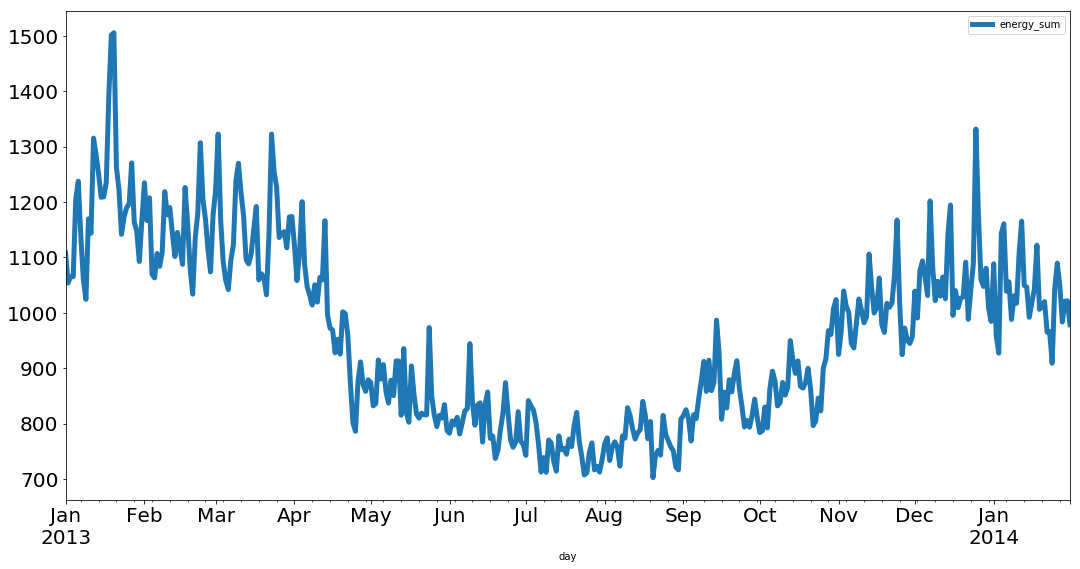

In [121]:
agg_holiday_weather.plot.line(x = 'day', y = 'energy_sum',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

The graph clearly shows that the energy  consumption is high during jan to march and then nov and dec

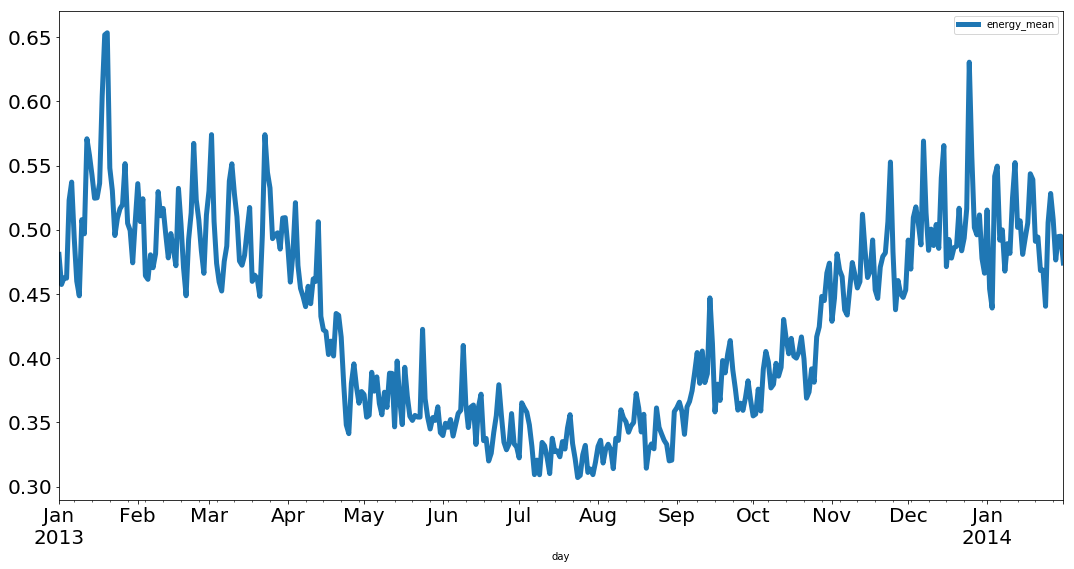

In [122]:
agg_holiday_weather.plot.line(x = 'day', y = 'energy_mean',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

In [123]:
df=agg_holiday_weather
date = df['day']

In [124]:
#df.day

In [125]:
temp= pd.DatetimeIndex(date)
month = pd.Series(temp.month)

In [126]:
to_be_plotted  = df.drop(['day'], axis = 1)

In [127]:
to_be_plotted.columns

Index(['energy_sum', 'energy_mean', 'Bank holidays', 'Type', 'temperatureMax',
       'temperatureMaxTime', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [128]:
len(to_be_plotted)

396

In [129]:
to_be_plotted1 = to_be_plotted.join(month)


In [130]:
len(to_be_plotted1)

396

In [131]:
to_be_plotted1.columns
## doubt: when we are joining by month then why the new column has been renamed as day.

Index(['energy_sum', 'energy_mean', 'Bank holidays', 'Type', 'temperatureMax',
       'temperatureMaxTime', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean', 'day'],
      dtype='object')

In [132]:
to_be_plotted1.rename(columns={'day': 'month'}, inplace=True)

In [133]:
to_be_plotted1.head()

,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean,month
0,1107.903999,0.480861,True,New Year?s Day,7.49,1/1/2013 1:00,257.0,partly-cloudy-day,2.40,1/1/2013 15:00,...,1/1/2013 8:00,1/1/2013 11:00,Partly cloudy throughout the day.,1/1/2013 19:00,0.23,1/1/2013 23:00,1/1/2013 19:00,0.63,5.400,1
1,1053.920000,0.457431,False,NaN,10.82,1/2/2013 22:00,242.0,partly-cloudy-night,5.41,1/2/2013 3:00,...,1/2/2013 19:00,1/2/2013 12:00,Mostly cloudy throughout the day.,1/3/2013 7:00,0.23,1/2/2013 22:00,1/3/2013 7:00,0.66,7.065,1
2,1065.897001,0.462629,False,NaN,11.41,1/3/2013 13:00,255.0,partly-cloudy-day,9.12,1/3/2013 7:00,...,1/3/2013 13:00,1/3/2013 11:00,Mostly cloudy throughout the day.,1/4/2013 7:00,7.07,1/3/2013 13:00,1/4/2013 6:00,0.70,10.530,1
3,1065.254000,0.462350,True,Easter Monday,10.79,1/4/2013 0:00,266.0,partly-cloudy-day,7.31,1/4/2013 23:00,...,1/4/2013 15:00,1/4/2013 11:00,Mostly cloudy throughout the day.,1/5/2013 2:00,5.70,1/4/2013 0:00,1/4/2013 23:00,0.73,9.480,1
4,1205.142999,0.523066,False,NaN,10.66,1/5/2013 14:00,251.0,partly-cloudy-day,7.82,1/5/2013 23:00,...,1/5/2013 14:00,1/5/2013 12:00,Mostly cloudy until evening.,1/6/2013 3:00,5.76,1/5/2013 14:00,1/6/2013 4:00,0.77,9.250,1


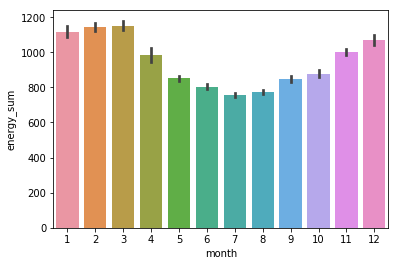

In [134]:
sns.barplot(x = 'month', y = 'energy_sum', data = to_be_plotted1)
plt.show()

In [ ]:
# the above graph shows that the total energy consumption is high in October to December.

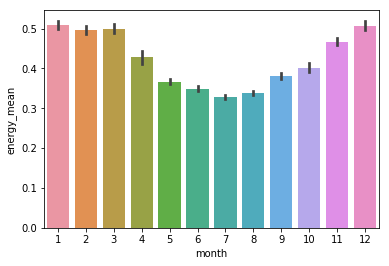

In [291]:
sns.barplot(x = 'month', y = 'energy_mean', data = to_be_plotted1)
plt.show()

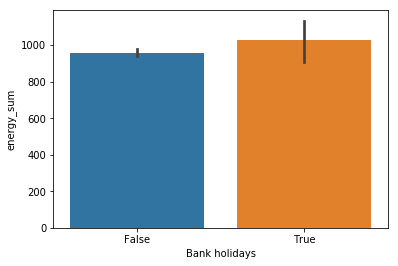

In [141]:
 sns.barplot(x = 'Bank holidays', y = 'energy_sum', data = to_be_plotted1)
plt.show()

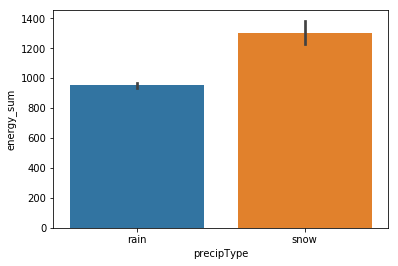

In [142]:
 sns.barplot(x = 'precipType', y = 'energy_sum', data = to_be_plotted1)
plt.show()

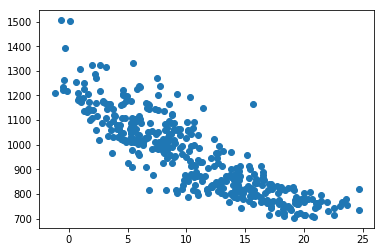

In [135]:
matplotlib.pyplot.scatter(x='temperatureMean', y='energy_sum', data=to_be_plotted1)
plt.show()

the above graph shows when the avg temperature is low , energy is consumed maximum

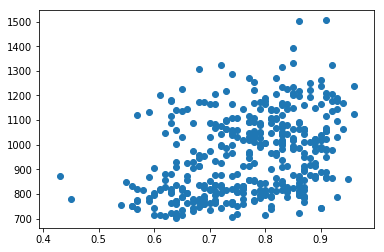

In [136]:
matplotlib.pyplot.scatter(x='humidity', y='energy_sum', data=to_be_plotted1)
plt.show()

The above graph shows when humidity increases total energy consumption increases

In [137]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['humidity'])

0.36111378223713553

In [138]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['temperatureMean'])

-0.86281470013053441

In [139]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['apparentTemperatureMin'])

-0.84334539600503022

In [140]:
to_be_plotted1['energy_mean'].corr(to_be_plotted1['temperatureMean'])

-0.85439117095035788

In [ ]:
# as shown in graph the there is negative correlation between mean temperature and total energy consumed in a day. There is very
# little correlation between humidity and total enery. As expected negative correlation between apparentTemperatureMin and 
# apparentTemperatureMAx with total energy_consumed

In [143]:
#df.head()

In [144]:
#df.columns

In [145]:
list(df['precipType'].unique())

['rain', 'snow', nan]

In [146]:
final_DL_dataset  = df.drop(['Type','energy_mean','temperatureMaxTime','icon','temperatureMinTime','apparentTemperatureMinTime',
                                       'apparentTemperatureHighTime', 'time','sunsetTime',
                                       'sunriseTime','temperatureHighTime','uvIndexTime','summary','temperatureLowTime',
                                      'apparentTemperatureMaxTime', 'apparentTemperatureLowTime' ], axis = 1)

In [147]:
final_DL_dataset.columns

Index(['day', 'energy_sum', 'Bank holidays', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean'],
      dtype='object')

adding variables like month, year, day of week, day of year etc from day variable

In [148]:
add_datepart(final_DL_dataset, "day", drop=False)

In [61]:
??add_datepart

In [149]:
final_DL_dataset.columns

Index(['day', 'energy_sum', 'Bank holidays', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean', 'dayYear',
       'dayMonth', 'dayWeek', 'dayDay', 'dayDayofweek', 'dayDayofyear',
       'dayIs_month_end', 'dayIs_month_start', 'dayIs_quarter_end',
       'dayIs_quarter_start', 'dayIs_year_end', 'dayIs_year_start',
       'dayElapsed'],
      dtype='object')

In [150]:
final_DL_dataset  = final_DL_dataset.drop(['dayElapsed'], axis=1)

In [151]:
cat_vars = ['Bank holidays','precipType', 'dayMonth', 'dayDayofyear','dayYear','dayWeek', 'dayDay', 'dayDayofweek',
       'dayIs_month_end', 'dayIs_month_start',
       'dayIs_quarter_end', 'dayIs_quarter_start', 'dayIs_year_end',
       'dayIs_year_start']

contin_vars = ['temperatureMax','windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh','visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean']
n = len(final_DL_dataset); n

396

In [152]:
for v in cat_vars: final_DL_dataset[v] = final_DL_dataset[v].astype('category').cat.as_ordered()
for v in contin_vars: final_DL_dataset[v] = final_DL_dataset[v].astype('float32')
dep = 'energy_sum'
final_DL_dataset = final_DL_dataset[cat_vars+contin_vars+[dep, 'day']]

In [153]:
final_DL_dataset.head(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,temperatureMean,energy_sum,day
0,True,rain,1,1,2013,1,1,1,False,True,...,4.38,1.0,4.42,3.31,5.76,0.23,0.63,5.400,1107.903999,2013-01-01
1,False,rain,1,2,2013,1,2,2,False,False,...,10.82,1.0,9.65,3.31,9.86,0.23,0.66,7.065,1053.920000,2013-01-02


In [113]:
#final_DL_dataset.columns

In [154]:
final_DL_dataset1 = final_DL_dataset.set_index("day")

final_DL_dataset1.index = pd.to_datetime(final_DL_dataset1.index,format='%Y/%m/%d')

In [99]:
#from datetime import datetime
#final_DL_dataset1.day1=datetime.strftime(final_DL_dataset1['day'],'%b %d, %Y')

#final_DL_dataset1['month']=datetime.strftime(final_DL_dataset1('day1'),'%m')##




In [155]:
final_DL_dataset1.head(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,temperatureMean,energy_sum
day,,,,,,,,,,,,,,,,,,,,,
2013-01-01,True,rain,1,1,2013,1,1,1,False,True,...,1.68,4.38,1.0,4.42,3.31,5.76,0.23,0.63,5.400,1107.903999
2013-01-02,False,rain,1,2,2013,1,2,2,False,False,...,7.07,10.82,1.0,9.65,3.31,9.86,0.23,0.66,7.065,1053.920000


In [156]:
df1, y, nas, mapper = proc_df(final_DL_dataset1, 'energy_sum', do_scale=True)
yl = np.log(y)

In [157]:
df1.tail(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,humidity_na,apparentTemperatureLow_na,apparentTemperatureMax_na,uvIndex_na,temperatureLow_na,temperatureMin_na,temperatureHigh_na,apparentTemperatureMin_na,moonPhase_na,temperatureMean_na
day,,,,,,,,,,,,,,,,,,,,,
2014-01-30,1,1,1,30,2,5,30,4,1,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315
2014-01-31,1,1,1,31,2,5,31,5,2,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315


In [158]:
train_ratio = 0.75
train_size = int(n * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [159]:
train_size

297

In [160]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [161]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, yl, cat_flds=cat_vars, bs=128)

In [162]:
cat_sz = [(c, len(final_DL_dataset1[c].cat.categories)+1) for c in cat_vars]

In [163]:
cat_sz

[('Bank holidays', 3),
 ('precipType', 3),
 ('dayMonth', 13),
 ('dayDayofyear', 366),
 ('dayYear', 3),
 ('dayWeek', 53),
 ('dayDay', 32),
 ('dayDayofweek', 8),
 ('dayIs_month_end', 3),
 ('dayIs_month_start', 3),
 ('dayIs_quarter_end', 3),
 ('dayIs_quarter_start', 3),
 ('dayIs_year_end', 3),
 ('dayIs_year_start', 3)]

In [164]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [165]:
emb_szs

[(3, 2),
 (3, 2),
 (13, 7),
 (366, 50),
 (3, 2),
 (53, 27),
 (32, 16),
 (8, 4),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

In [261]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.40, 1, [1000,500], [0.50,0.60], y_range=y_range)
lr = 1e-4

In [262]:
m.lr_find()

A Jupyter Widget

[ 0.       3.48233  3.41783]                    



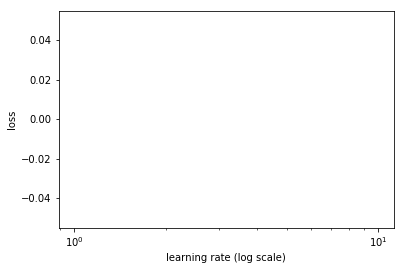

In [263]:
m.sched.plot(n_skip=0)
plt.show()

In [264]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.40, 1, [1000,500], [0.60,0.50], y_range=y_range)
lr = 1e-4

In [266]:
m.fit(lr, 4, metrics=[exp_rmspe])

A Jupyter Widget

[ 0.       1.2589   0.13461  0.67561]           
[ 1.       1.18463  0.23277  0.69791]           
[ 2.       1.16778  0.19334  0.68563]           
[ 3.       1.12509  0.13157  0.6723 ]           



In [267]:
yval = yl[val_idx]
yval.shape

(99,)

In [268]:
??m.predict()

In [269]:
yp = m.predict().squeeze()
yp.shape

(99,)

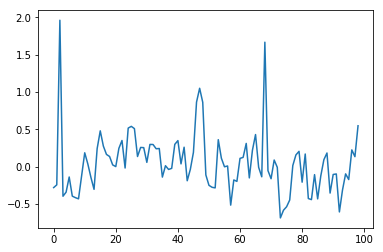

In [177]:

plt.plot(yp-yval)
plt.show()

In [270]:
m.fit(lr, 1, metrics=[exp_rmspe], cycle_len=1)

A Jupyter Widget

[ 0.       1.05115  0.12133  0.67758]           



In [271]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=3)

A Jupyter Widget

[ 0.       1.19406  0.11935  0.67755]           
[ 1.       1.04434  0.11865  0.68663]           
[ 2.       1.00447  0.11897  0.68786]           
[ 3.       0.99671  0.11984  0.68989]            
[ 4.       0.99209  0.12126  0.69334]            
[ 5.       0.97001  0.12125  0.69307]            



## RF

In [193]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
#((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df1.values, yl)

In [198]:
df1.tail()

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,humidity_na,apparentTemperatureLow_na,apparentTemperatureMax_na,uvIndex_na,temperatureLow_na,temperatureMin_na,temperatureHigh_na,apparentTemperatureMin_na,moonPhase_na,temperatureMean_na
day,,,,,,,,,,,,,,,,,,,,,
2014-01-27,1,1,1,27,2,5,27,1,1,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315
2014-01-28,1,1,1,28,2,5,28,2,1,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315
2014-01-29,1,1,1,29,2,5,29,3,1,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315
2014-01-30,1,1,1,30,2,5,30,4,1,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315
2014-01-31,1,1,1,31,2,5,31,5,2,1,...,-0.050315,-0.050315,-0.050315,-0.071247,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315,-0.050315


In [199]:
len(df1)

396

In [204]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()


n_valid = 31 
n_trn = len(df1)-n_valid
#raw_train, raw_valid = split_vals(df1, n_trn)
trn, val = split_vals(df1, n_trn)
y_trn, y_val = split_vals(yl,n_trn)
#_

In [287]:
preds

array([ 7.00233,  7.01856,  7.04071,  7.08013,  7.09098,  6.93866,  6.97676,  6.98875,  7.0174 ,  7.03589,
        7.08172,  7.08794,  7.00698,  7.01713,  7.0018 ,  7.0158 ,  7.04445,  7.08141,  7.0771 ,  7.00665,
        7.0072 ,  7.00541,  7.03438,  7.04328,  7.05598,  7.08781,  7.01478,  7.00703,  7.03061,  7.02137,
        7.05458])

In [288]:
y_val

array([ 6.99263,  6.8657 ,  6.83228,  7.04179,  7.05691,  6.94604,  6.9622 ,  6.89576,  6.93787,  6.9249 ,
        7.01052,  7.06092,  6.95644,  6.95323,  6.89982,  6.92617,  6.94991,  7.02299,  6.91413,  6.91929,
        6.92791,  6.87248,  6.87326,  6.81246,  6.95049,  6.99369,  6.95536,  6.89114,  6.92844,  6.9293 ,
        6.88614])

In [290]:
??m_rf.score

In [280]:
val.shape

(31, 50)

In [276]:
m_rf = RandomForestRegressor(n_estimators=25, max_features=0.75, min_samples_leaf=10,
                          n_jobs=-1, oob_score=True)
m_rf.fit(trn, y_trn);

In [277]:
preds = m_rf.predict(val)
m_rf.score(trn, y_trn), m_rf.score(val, y_val), m_rf.oob_score_, exp_rmspe(preds, y_val)

(0.90803804750563,
 -2.2700120183550574,
 0.85441778766276011,
 0.1165854906815976)

In [278]:
??m_rf.score

In [207]:
m_rf = RandomForestRegressor(n_estimators=25, max_features=0.90, min_samples_leaf=4,
                          n_jobs=-1, oob_score=True)
m_rf.fit(trn, y_trn);
preds = m_rf.predict(val)
m_rf.score(trn, y_trn), m_rf.score(val, y_val), m_rf.oob_score_, exp_rmspe(preds, y_val)

(0.95812278885852364,
 -2.0632455084479724,
 0.88093240686883323,
 0.11227520481178563)

In [208]:
y_val.shape

(31,)

In [209]:
preds.shape

(31,)

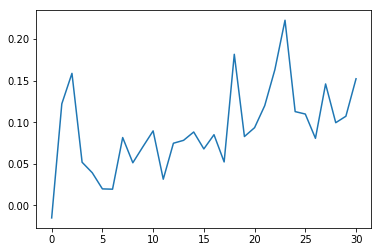

In [210]:
plt.plot(preds-y_val)
plt.show()

In [211]:
fi = rf_feat_importance(m_rf, trn); fi[:10]

,cols,imp
24,apparentTemperatureMax,0.224578
31,temperatureMean,0.219939
14,temperatureMax,0.204890
3,dayDayofyear,0.122582
28,temperatureHigh,0.068974
20,apparentTemperatureHigh,0.059600
7,dayDayofweek,0.018380
25,uvIndex,0.014337
5,dayWeek,0.012337
26,temperatureLow,0.006252


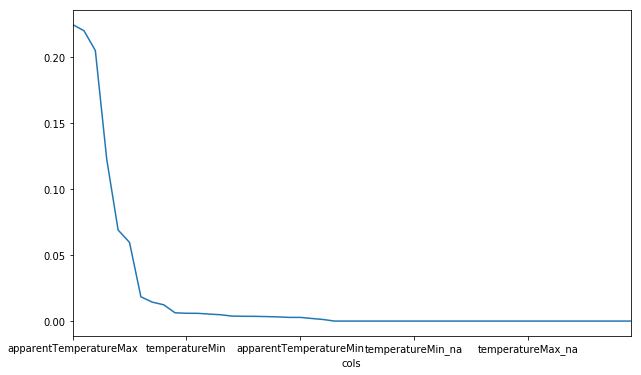

In [212]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);
plt.show()

In [213]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

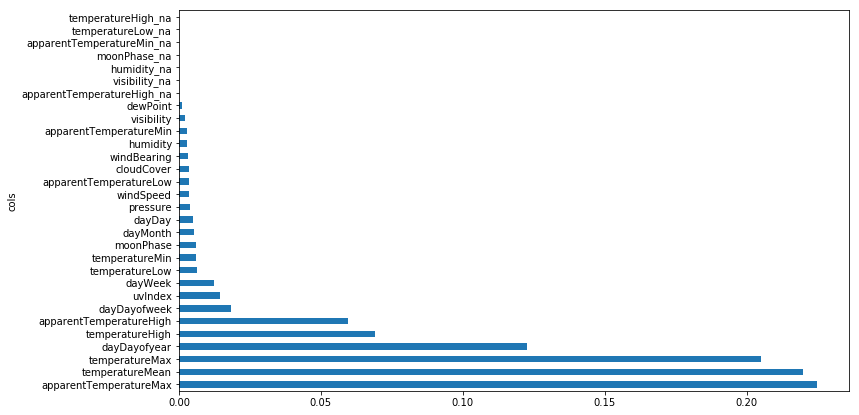

In [214]:
plot_fi(fi[:30]);
plt.show()